In [21]:
# Import fastai for learning cnn models 
from fastai.vision.all import *
import re
import pickle
import numpy as np
import PIL

# Function to unpickle the dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict 

In [22]:
path = Path()/'CIFAR10/'

In [23]:
filenames = path.ls()
print(filenames)
train_path = filenames[1:6]
print(train_path)
valid_path = filenames[-1]
print(valid_path)

[Path('CIFAR10/batches.meta'), Path('CIFAR10/data_batch_1'), Path('CIFAR10/data_batch_2'), Path('CIFAR10/data_batch_3'), Path('CIFAR10/data_batch_4'), Path('CIFAR10/data_batch_5'), Path('CIFAR10/readme.html'), Path('CIFAR10/test_batch')]
[Path('CIFAR10/data_batch_1'), Path('CIFAR10/data_batch_2'), Path('CIFAR10/data_batch_3'), Path('CIFAR10/data_batch_4'), Path('CIFAR10/data_batch_5')]
CIFAR10/test_batch


In [24]:
# Upack all the training batches from the original dataset 
train_batch = [unpickle(items) for items in train_path]
valid_batch = unpickle(valid_path)
# Upack all the images stored as numpy array from the training dataset.
train_x = train_batch[1][b'data']
train_y = train_batch[1][b'labels']
valid_x = valid_batch[b'data']
valid_y = valid_batch[b'labels']


To train a model with all 5 arrays stacked into a single numpy array
train_x = np.zeros((0,3072))
for batches in train_batch:
    print(batches[b'data'].shape)
    train_x = np.append(train_x, batches[b'data'], axis=0)
    print(train_x.shape)




In [25]:
train_x_im = [(np.transpose(np.reshape(items,[3, 32, 32]))) for items in train_x ]
valid_x_im = [np.transpose(np.reshape(items,[3, 32, 32])) for items in valid_x ]

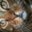

In [26]:
Image.fromarray(train_x_im[5], 'RGB')

In [27]:
# make a list of tensor from images 
train_x_tens = [tensor(Image.fromarray(images, 'RGB')) for images in train_x_im]
valid_x_tens = [tensor(Image.fromarray(images, 'RGB')) for images in valid_x_im]

<AxesSubplot:>

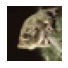

In [28]:
# check the len of list of tensor and the images from tensor 
len(train_x_tens)
show_image(train_x_tens[1])

In [29]:
# Stack the list of tensors images into a single tensor and normalise 
stacked_train = torch.stack(train_x_tens).float()/3072
stacked_valid = torch.stack(valid_x_tens).float()/3072

In [30]:
# Check the shape of stacked tensors
print(stacked_train.shape)
print(stacked_valid.shape)

torch.Size([10000, 32, 32, 3])
torch.Size([10000, 32, 32, 3])


In [50]:
# Vector 
train_X = stacked_train.view(-1, 3*32*32)
valid_X = stacked_valid.view(-1, 3*32*32)
print(train_X.shape)
print(valid_X.shape)

torch.Size([10000, 3072])
torch.Size([10000, 3072])


In [51]:
# Labels 
train_Y = tensor(train_y).unsqueeze(1)
valid_Y = tensor(valid_y).unsqueeze(1)
print(train_Y.shape)
print(valid_Y.shape)

torch.Size([10000, 1])
torch.Size([10000, 1])


In [52]:
# Create training and validation dataset 
train_dset = list(zip(train_X, train_Y))
valid_dset = list(zip(valid_X, valid_Y))


In [53]:
print(len(train_dset))
print(len(valid_dset))
type(train_dset)
x,y = train_dset[0]
x.shape, y

10000
10000


(torch.Size([3072]), tensor([1]))

In [54]:
# Create individual dataloaders
train_dl = DataLoader(train_dset, batch_size =256)
valid_dl = DataLoader(valid_dset, batch_size =256)

# Combine the dataloaders into one 
dls = DataLoaders(train_dl, valid_dl)

In [55]:
# Creat a small test set from previously seen/ unseen data 
test_set = train_X[0:4]
test_labels = train_Y[0:4]

In [58]:
# Create a model and test its accuracy
simple_net = nn.Sequential(
    nn.Linear(3*32*32,30),
    nn.ReLU(),
    nn.Linear(30,10)
)

learn = Learner(dls, simple_net, loss_func=nn.Cr ,metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

AssertionError: Could not infer loss function from the data, please pass a loss function.